In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
import numpy as np

In [5]:
import fatd.holders
import fatd.transform.data
import fatd.measure.accountability.data
import fatd.measure.fairness.data
import fatd.measure.accountability.models
import fatd.measure.fairness.models
import fatd.measure.fairness.predictions
import fatd.measure.accountability.predictions

# Get data

In [6]:
raw_data_path = 'data/iris.csv'
data = fatd.holders.csv_loader(raw_data_path)

In [7]:
data.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

# Transform

## Data

In [8]:
data_1 = data.apply(fatd.transform.data.mean, axis=1)
data_1.data[:10]

array([[5.1  , 3.5  , 1.4  , 0.2  , 2.55 ],
       [4.9  , 3.   , 1.4  , 0.2  , 2.375],
       [4.7  , 3.2  , 1.3  , 0.2  , 2.35 ],
       [4.6  , 3.1  , 1.5  , 0.2  , 2.35 ],
       [5.   , 3.6  , 1.4  , 0.2  , 2.55 ],
       [5.4  , 3.9  , 1.7  , 0.4  , 2.85 ],
       [4.6  , 3.4  , 1.4  , 0.3  , 2.425],
       [5.   , 3.4  , 1.5  , 0.2  , 2.525],
       [4.4  , 2.9  , 1.4  , 0.2  , 2.225],
       [4.9  , 3.1  , 1.5  , 0.1  , 2.4  ]])

In [9]:
new_data_2 = np.ones((data.n_rows,1))
print(new_data_2[0:10])

data_2 = data.append(new_data_2, axis=1)
data_2.data[-10:]

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


array([[6.7, 3.1, 5.6, 2.4, 1. ],
       [6.9, 3.1, 5.1, 2.3, 1. ],
       [5.8, 2.7, 5.1, 1.9, 1. ],
       [6.8, 3.2, 5.9, 2.3, 1. ],
       [6.7, 3.3, 5.7, 2.5, 1. ],
       [6.7, 3. , 5.2, 2.3, 1. ],
       [6.3, 2.5, 5. , 1.9, 1. ],
       [6.5, 3. , 5.2, 2. , 1. ],
       [6.2, 3.4, 5.4, 2.3, 1. ],
       [5.9, 3. , 5.1, 1.8, 1. ]])

In [10]:
new_data_3 = np.ones((7,4))
new_target_3 = np.zeros((7,1))
print(new_data_3[0:10])
print(new_target_3[0:10])

data_3 = data.append(new_data_3, target_array=new_target_3, axis=0)
data_3.data[-10:]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


array([[6.5, 3. , 5.2, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [5.9, 3. , 5.1, 1.8],
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. ]])

In [11]:
data_1_1 = data_1.delete([0,3], axis=1)
data_1_1.data[:10]

array([[3.5  , 1.4  , 2.55 ],
       [3.   , 1.4  , 2.375],
       [3.2  , 1.3  , 2.35 ],
       [3.1  , 1.5  , 2.35 ],
       [3.6  , 1.4  , 2.55 ],
       [3.9  , 1.7  , 2.85 ],
       [3.4  , 1.4  , 2.425],
       [3.4  , 1.5  , 2.525],
       [2.9  , 1.4  , 2.225],
       [3.1  , 1.5  , 2.4  ]])

In [12]:
# threshold -- apply a function with extra arguments
threshold = lambda x: fatd.transform.data.threshold(value=x, lower=0.5, upper=1.5)

data_1_2 = data_1.apply(threshold, indices=[2], axis=1)
data_1_2.data[:10]

array([[5.1  , 3.5  , 1.4  , 0.2  , 2.55 , 1.4  ],
       [4.9  , 3.   , 1.4  , 0.2  , 2.375, 1.4  ],
       [4.7  , 3.2  , 1.3  , 0.2  , 2.35 , 1.3  ],
       [4.6  , 3.1  , 1.5  , 0.2  , 2.35 , 1.5  ],
       [5.   , 3.6  , 1.4  , 0.2  , 2.55 , 1.4  ],
       [5.4  , 3.9  , 1.7  , 0.4  , 2.85 , 1.5  ],
       [4.6  , 3.4  , 1.4  , 0.3  , 2.425, 1.4  ],
       [5.   , 3.4  , 1.5  , 0.2  , 2.525, 1.5  ],
       [4.4  , 2.9  , 1.4  , 0.2  , 2.225, 1.4  ],
       [4.9  , 3.1  , 1.5  , 0.1  , 2.4  , 1.5  ]])

## Model and Predictions

Should not be transformed at the moment.

## Straightforward computation on `data_1_2` ##

### Data to Model ###

In [13]:
data_1_2_to_model = fatd.holders.Data2Model()
untrained_model_1_2 = fatd.holders.models.KNN()
model_1_2 = data_1_2_to_model.transform(data_1_2, untrained_model_1_2)

### Model to Predictions ###

In [14]:
model_1_2_to_predictions = fatd.holders.Model2Predictions()
predictions_1_2 = model_1_2_to_predictions.transform(model_1_2, data_1_2, data_1_2_to_model)

Using test partition of the data based on the data_to_model object.


## More complicated computation on `data_2` ##

### Data to Model ##

In [15]:
data_2_to_model = fatd.holders.Data2Model()
untrained_model_2 = fatd.holders.models.KNN()
model_2 = data_2_to_model.transform(data_2, untrained_model_2)

### Model to Predictions... ###

In [16]:
model_2_to_predictions = fatd.holders.Model2Predictions()

#### ...based on splitter (`data_to_model`) partition ####

In [17]:
predictions_2_from_data_2 = model_2_to_predictions.transform(model_2, data_2, data_2_to_model)

Using test partition of the data based on the data_to_model object.


#### ...based on a new data set ####

In [18]:
# Define new data
external_raw_data = np.zeros((6,5))
external_target = np.ones((6,))
external_data = fatd.holders.Data(external_raw_data, external_target)

# Predict on an extra set of data
predictions_2_from_external_data = model_2_to_predictions.transform(model_2, external_data)

Missing data_to_model object. Using the whole data set.


# Measure

## Data ##

In [19]:
names, values = fatd.measure.accountability.data.class_count(data_1_2)

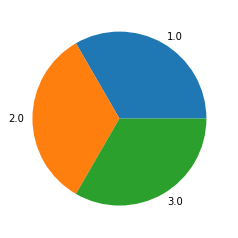

In [20]:
plt.pie(values, labels=names)
plt.show()

In [21]:
# Get a histogram of column index 3 of the data
bins, counts = fatd.measure.fairness.data.feature_histogram(data_1_2, 3)

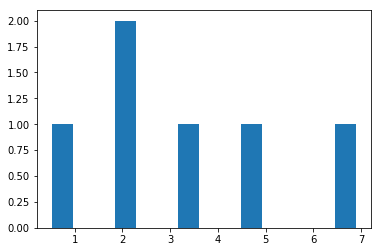

In [22]:
bin_width = bins[1]-bins[0]
bins_centres = [bins[i]+(bins[i+1]-bins[i]/2) for i in range(len(bins)-1)]
plt.bar(bins_centres, counts, bin_width)
plt.show()

## Model ##

In [23]:
model_1_2_training_accuracy = fatd.measure.fairness.models.training_accuracy(model_1_2, data_1_2_to_model, data_1_2)

In [24]:
print('{:2.2f}'.format(model_1_2_training_accuracy))

0.97


In [25]:
model_1_2_data_accuracy = fatd.measure.fairness.models.data_accuracy(model_1_2, data_1_2)

In [26]:
print('{:2.2f}'.format(model_1_2_data_accuracy))

0.97


In [27]:
model_1_2_training_confusion_matrix = fatd.measure.accountability.models.training_confusion_matrix(model_1_2, data_1_2_to_model, data_1_2)

In [28]:
model_1_2_training_confusion_matrix

array([[40.,  0.,  0.],
       [ 0., 38.,  2.],
       [ 0.,  2., 38.]])

In [29]:
model_1_2_data_confusion_matrix = fatd.measure.accountability.models.data_confusion_matrix(model_1_2, data_1_2)

In [30]:
model_1_2_data_confusion_matrix

array([[50.,  0.,  0.],
       [ 0., 48.,  2.],
       [ 0.,  2., 48.]])

## Predictions ##

In [31]:
predictions_2_from_data_2_confusion_matrix = fatd.measure.accountability.predictions.prediction_confusion_matrix(predictions_2_from_data_2)

In [32]:
predictions_2_from_data_2_confusion_matrix

array([[10.,  0.,  0.],
       [ 0., 10.,  0.],
       [ 0.,  0., 10.]])

In [33]:
predictions_2_from_data_2_accuracy = fatd.measure.fairness.predictions.prediction_accuracy(predictions_2_from_data_2)

In [34]:
print('{:2.2f}'.format(predictions_2_from_data_2_accuracy))

1.00


---

In [35]:
predictions_2_from_external_data_2_confusion_matrix = fatd.measure.accountability.predictions.prediction_confusion_matrix(predictions_2_from_external_data)

In [36]:
predictions_2_from_external_data_2_confusion_matrix

array([[6., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [37]:
predictions_2_from_external_data_accuracy = fatd.measure.fairness.predictions.prediction_accuracy(predictions_2_from_external_data)

In [38]:
print('{:2.2f}'.format(predictions_2_from_external_data_accuracy))

1.00
